In [2]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [3]:
plt.rcParams.update({'font.size': 20})

In [4]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

In [5]:
file = os.path.join(root_directory,'20191204_anatomy_collection','meanbrain20191208.nii')
meanbrain = bbb.load_numpy_brain(file)

# Reset master spacing
meanbrain = ants.from_numpy(meanbrain)
anatomy_xml = os.path.join(root_directory,'fly_25', 'anat_0', 'anatomy.xml')
meanbrain.set_spacing(bbb.get_resolution(anatomy_xml))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 154.99 ms


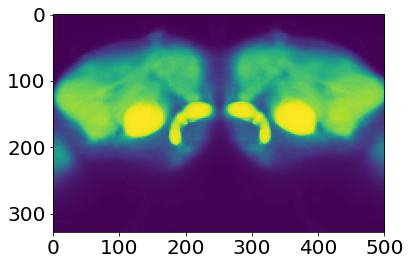

In [6]:
plt.imshow(meanbrain.numpy()[:,:,90].T)

# Load individual anatomy

In [7]:
flies = [1,3,5,7,19,21,48,51,54,68]
fly_folders = [os.path.join(root_directory,'fly_{}'.format(x)) for x in flies]
anatomy = {}

for fly in fly_folders:
    anat_folders = []
    anat_folders = [os.path.join(fly,x) for x in os.listdir(fly) if 'anat' in x]
    if len(anat_folders) > 0:
        for anat_folder in anat_folders:
            fly_num = os.path.split(fly)[-1]
            anat_num = os.path.split(anat_folder)[-1]
            this_anat = '{},{}'.format(fly_num, anat_num)
            if this_anat == 'fly_12,anat_0':
                anatomy[this_anat] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anat_mean.nii'))
                print('Loaded SPECIAL {}'.format(this_anat))
                continue
            try:
                anatomy[this_anat] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anatomy_channel_1.nii'))
                print('Loaded {}'.format(this_anat))
            except:
                print('failed to load anatomy_channel_1.nii: {}'.format(this_anat))
                try:
                    anatomy[this_anat] = bbb.load_numpy_brain(os.path.join(anat_folder, 'anatomy.nii'))
                except:
                    print('failed to load anatomy.nii: {}'.format(this_anat))


~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_1,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 164.31 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_3,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 241.22 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_5,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 146.86 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_7,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 163.13 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_19,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 224.45 ms

~~ load_numpy_brain ~~
failed to load anatomy_channel_1.nii: fly_21,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 150.74 ms

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 125.76 ms
Loaded fly_48,anat_0

~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 1

In [8]:
anatomy.pop('fly_68,anat_0');

In [9]:
for i in anatomy:
    print(i)

fly_1,anat_0
fly_3,anat_0
fly_5,anat_0
fly_7,anat_0
fly_19,anat_0
fly_21,anat_0
fly_48,anat_0
fly_51,anat_0
fly_54,anat_0
fly_68,anat_1


In [10]:
to_rotate = ['fly_7,anat_0', 'fly_1,anat_0']
for k in to_rotate:
    anatomy[k] = np.swapaxes(anatomy[k],0,1)

In [ ]:
anatomy_ants = {}
for anat in anatomy:
    fly_num, anat_num = anat.split(',')
    anatomy_xml = os.path.join(root_directory, fly_num, anat_num, 'anatomy.xml')
    anatomy_ants[anat] = ants.from_numpy(anatomy[anat])
    anatomy_ants[anat].set_spacing(bbb.get_resolution(anatomy_xml))
    print('DONE: {}'.format(anat))

DONE: fly_1,anat_0
DONE: fly_3,anat_0
DONE: fly_5,anat_0
DONE: fly_7,anat_0
DONE: fly_19,anat_0
DONE: fly_21,anat_0
DONE: fly_48,anat_0
DONE: fly_51,anat_0
DONE: fly_54,anat_0
DONE: fly_68,anat_1


# Align to meanbrain

In [ ]:
master = meanbrain
for anat in anatomy_ants:#anatomy_ants:
    print('Working on {}'.format(anat))
    t0 = time.time()
    slave = anatomy_ants[anat]
    slave2master = ants.registration(master,
                                     slave,
                                     type_of_transform='SyN')
    
    print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))
    file = os.path.join(root_directory,
                        '20191204_anatomy_collection',
                        '20191227_ants',
                        '{}.nii'.format(anat))
    bbb.save_brain(file, slave2master['warpedmovout'].numpy())

Working on fly_1,anat_0
COMPLETE. Duration: 192 sec

~~ save_brain ~~
Current memory usage: 7.56GB
save_brain done. Duration: 330.70 ms
Working on fly_3,anat_0


In [1]:
1

1